In [1]:
"""
# India Terrorism Data Analysis

# Objective
This notebook performs an exploratory data analysis (EDA) of terrorism-related incidents in India using open-source datasets.  
The goal is to identify temporal, regional, and categorical patterns and examine their alignment with major security and policy events.

# Scope
- Geographic focus: India  
- Time span: Based on available GTD data  
- Nature of analysis: Descriptive and exploratory (no causal claims)
"""


'\n# India Terrorism Data Analysis\n\n# Objective\nThis notebook performs an exploratory data analysis (EDA) of terrorism-related incidents in India using open-source datasets.  \nThe goal is to identify temporal, regional, and categorical patterns and examine their alignment with major security and policy events.\n\n# Scope\n- Geographic focus: India  \n- Time span: Based on available GTD data  \n- Nature of analysis: Descriptive and exploratory (no causal claims)\n'

In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)
plt.style.use("default")


In [3]:
global_df=pd.read_csv(r"C:\Users\byome\Phyton Project\india_terrorism_data analysis\data\raw\GlobalTerrorismDatabase_for_Analysis.csv", low_memory=False)

In [4]:
global_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209706 entries, 0 to 209705
Columns: 135 entries, eventid to related
dtypes: float64(54), int64(23), object(58)
memory usage: 216.0+ MB


In [5]:
work_df=global_df[global_df["country_txt"]=="India"]

In [6]:
work_df

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
1186,197202220004,1972,2,22,NaN,0,NaN,92,India,6,South Asia,Delhi,New Delhi,28.585836,77.153336,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0.0,1,0,4,Hijacking,NaN,NaN,NaN,NaN,6,Airports & Aircraft,42.0,Aircraft (not at an airport),Lufthansa,B-747,75.0,Germany,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Palestinians,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosives,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,1.0,187.0,0.0,NaN,NaN,Yemen,Yemen,1.0,5000000.0,NaN,NaN,NaN,NaN,2.0,Hostage(s) released by perpetrators,187.0,NaN,NaN,NaN,NaN,Hijacking DB,1,1,1,1,NaN
2763,197501190004,1975,1,2,NaN,0,NaN,92,India,6,South Asia,Bihar,Samastipur,25.863042,85.781004,1.0,0,The attack occurred in the town,"1/2/1975: The Indian Railway Minister, Lalit N...",1,1,1,0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,2,Government (General),18.0,"Government Personnel (excluding police, military)",Railway Minister of India and legislator,Lalit Narayan Mishra and a legislator,92.0,India,3.0,Police,25.0,Police Security Forces/Officers,Guards,2 Guards,92.0,India,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ananda Marga,NaN,NaN,NaN,NaN,NaN,Unknown,1.0,NaN,NaN,0,-99.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No additional information available.,4.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,The case is very unclear and there are many ru...,"""Leaders of India Irate at Killing: Death of A...","Dhananjay Mahapatra, ""SC: Why has LN Mishra mu...",NaN,UMD Encyclopedia of World Terrorism 2012,0,0,0,0,NaN
3856,197605260001,1976,5,26,NaN,0,NaN,92,India,6,South Asia,Delhi,New Delhi,28.585836,77.153336,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,6,Airports & Aircraft,44.0,Airport,NaN,New Delhi airport,92.0,India,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,0.0,NaN,NaN,0.0,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,0,-9,NaN
5326,197709280004,1977,9,28,NaN,0,NaN,92,India,6,South Asia,Maharashtra,Bombay,19.075984,72.877656,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0.0,1,0,4,Hijacking,NaN,NaN,NaN,NaN,6,Airports & 

In [7]:
work_df.shape

(13929, 135)

In [8]:

india_df=work_df[(work_df["iyear"]>=2000)&(work_df["iyear"]<=2020)]

In [9]:
india_df

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
69835,200001010003,2000,1,1,NaN,0,NaN,92,India,6,South Asia,Jammu and Kashmir,Udhampur,32.925224,75.135264,1.0,0,NaN,01/01/2000: Members of Lashkar-e Taiba attacke...,1,1,1,1,1.0,Insurgency/Guerilla Action,0.0,1,0,2,Armed Assault,NaN,NaN,NaN,NaN,3,Police,22.0,"Police Building (headquarters, station, school)",Central Reserve Police Force,The Central Reserve Police Force 68 battalion ...,92.0,India,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lashkar-e-Taiba (LeT),NaN,NaN,NaN,NaN,NaN,Unknown,0.0,NaN,NaN,0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,Firearms,5.0,Unknown Gun Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A sniper rifle was used in addition to other g...,1.0,0.0,NaN,2.0,0.0,NaN,-9,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,“Lashkar 'Suicide' Squad Attacks Army Camp in ...,NaN,NaN,CETIS,1,1,0,1,NaN
69839,200001010007,2000,1,1,NaN,0,NaN,92,India,6,South Asia,Assam,Kakotibari,27.091373,95.023955,1.0,0,NaN,01/01/2000: An Oil and Natural Gas Commission ...,1,1,1,0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,21,Utilities,NaN,NaN,Oil and Natural Gas Commission,An Oil and Natural Gas Commission pipeline at ...,92.0,India,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United Liberation Front of Assam (ULFA),NaN,NaN,NaN,NaN,NaN,Unknown,1.0,NaN,NaN,0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,14.0,Time Fuse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1,4.0,Unknown,NaN,Approximately 10 feet of pipeline was damaged.,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,“India: ULFA Militants Blow Up Oil Pipeline in...,NaN,NaN,CETIS,0,0,0,0,NaN
69867,200001030003,2000,1,3,NaN,0,NaN,92,India,6,South Asia,Jammu and Kashmir,Srinagar,34.083740,74.789902,1.0,0,NaN,01/03/2000: A bomb exploded at a vegetable mar...,1,1,1,0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,14,Private Citizens & Property,74.0,Marketplace/Plaza/Square,Marketplace,A vegetable market in Srinagar,92.0,India,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,Unknown,0.0,NaN,NaN,0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,8.0,Landmine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,The bomb could have either been a surface mine...,18.0,0.0,0.0,30.0,0.0,0.0,1,4.0,Unknown,NaN,A number of carts and stalls in the market are...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Law Kumar Mishra, “Eighteen People Killed in L...",“Two BSF Soldiers A

In [10]:
final_df=india_df[['iyear','imonth','iday','provstate','city','attacktype1_txt','targtype1_txt','targsubtype1_txt','target1','gname','weaptype1_txt','nkill','nwound','summary','scite1']]

In [11]:
final_df

,iyear,imonth,iday,provstate,city,attacktype1_txt,targtype1_txt,targsubtype1_txt,target1,gname,weaptype1_txt,nkill,nwound,summary,scite1
69835,2000,1,1,Jammu and Kashmir,Udhampur,Armed Assault,Police,"Police Building (headquarters, station, school)",The Central Reserve Police Force 68 battalion ...,Lashkar-e-Taiba (LeT),Firearms,1.0,2.0,01/01/2000: Members of Lashkar-e Taiba attacke...,“Lashkar 'Suicide' Squad Attacks Army Camp in ...
69839,2000,1,1,Assam,Kakotibari,Bombing/Explosion,Utilities,NaN,An Oil and Natural Gas Commission pipeline at ...,United Liberation Front of Assam (ULFA),Explosives,0.0,0.0,01/01/2000: An Oil and Natural Gas Commission ...,“India: ULFA Militants Blow Up Oil Pipeline in...
69867,2000,1,3,Jammu and Kashmir,Srinagar,Bombing/Explosion,Private Citizens & Property,Marketplace/Plaza/Square,A vegetable market in Srinagar,Unknown,Explosives,18.0,30.0,01/03/2000: A bomb exploded at a vegetable mar...,"Law Kumar Mishra, “Eighteen People Killed in L..."
69887,2000,1,6,Delhi,New Delhi,Bombing/Explosion,Transportation,Train/Train Tracks/Trolley,A passenger train at the Old Delhi train station,Unknown,Explosives,0.0,23.0,01/06/2000: A bomb exploded on a passenger tra...,"“23 injured in Delhi railway station blast,” T..."
69888,2000,1,7,Andhra Pradesh,Unknown,Bombing/Explosion,Government (General),Politician or Political Party Movement/Meeting...,"G. Sukhender Reddy, Telugu Desam Party Member ...",People's War Group (PWG),Explosives,0.0,0.0,01/07/2000: Six Maoist guerrillas from the Peo...,“Extremists Blast House of Ruling Party MP in ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209681,2020,12,30,Chhattisgarh,Pusnar,Bombing/Explosion,Unknown,NaN,Unknown,Maoists,Explosives,0.0,1.0,12/30/2020: An explosive device detonated whil...,"""Chhattisgarh: CAF jawan injured in IED blast,..."
209684,2020,12,30,Jammu and Kashmir,Jandi,Bombing/Explosion,Religious Figures/Institutions,Place of Worship,Temple,Unknown,Explosives,0.0,0.0,12/30/2020: Assailants threw a grenade at a te...,"""Terrorist throws hand grenade at historic tem..."
209686,2020,12,30,Odisha,Malakangiri,Bombing/Explosion,Military,"Military Personnel (soldiers, troops, officers...",Security Forces,Maoists,Explosives,0.0,1.0,12/30/2020: An explosive device detonated targ...,"""Maoist Landmine Blast In Odisha-Chhattisgarh ..."
209692,2020,12,31,Jammu and Kashmir,Srinagar,Armed Assault,Business,Retail/Grocery/Bakery,Jeweler: Satpal Singh Nischal,The Resistance Front (TRF),Firearms,1.0,0.0,12/31/2020: Assailants shot and killed Satpal ...,"""Police access CCTV footage, get leads in jewe..."


In [12]:
final_df['date'] = pd.to_datetime(
    {
        'year': final_df['iyear'],
        'month': final_df['imonth'],
        'day': final_df['iday']
    },
    errors='coerce'
)


C:\Users\byome\AppData\Local\Temp\ipykernel_11276\1608305679.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['date'] = pd.to_datetime(


In [13]:
final_df

,iyear,imonth,iday,provstate,city,attacktype1_txt,targtype1_txt,targsubtype1_txt,target1,gname,weaptype1_txt,nkill,nwound,summary,scite1,date
69835,2000,1,1,Jammu and Kashmir,Udhampur,Armed Assault,Police,"Police Building (headquarters, station, school)",The Central Reserve Police Force 68 battalion ...,Lashkar-e-Taiba (LeT),Firearms,1.0,2.0,01/01/2000: Members of Lashkar-e Taiba attacke...,“Lashkar 'Suicide' Squad Attacks Army Camp in ...,2000-01-01
69839,2000,1,1,Assam,Kakotibari,Bombing/Explosion,Utilities,NaN,An Oil and Natural Gas Commission pipeline at ...,United Liberation Front of Assam (ULFA),Explosives,0.0,0.0,01/01/2000: An Oil and Natural Gas Commission ...,“India: ULFA Militants Blow Up Oil Pipeline in...,2000-01-01
69867,2000,1,3,Jammu and Kashmir,Srinagar,Bombing/Explosion,Private Citizens & Property,Marketplace/Plaza/Square,A vegetable market in Srinagar,Unknown,Explosives,18.0,30.0,01/03/2000: A bomb exploded at a vegetable mar...,"Law Kumar Mishra, “Eighteen People Killed in L...",2000-01-03
69887,2000,1,6,Delhi,New Delhi,Bombing/Explosion,Transportation,Train/Train Tracks/Trolley,A passenger train at the Old Delhi train station,Unknown,Explosives,0.0,23.0,01/06/2000: A bomb exploded on a passenger tra...,"“23 injured in Delhi railway station blast,” T...",2000-01-06
69888,2000,1,7,Andhra Pradesh,Unknown,Bombing/Explosion,Government (General),Politician or Political Party Movement/Meeting...,"G. Sukhender Reddy, Telugu Desam Party Member ...",People's War Group (PWG),Explosives,0.0,0.0,01/07/2000: Six Maoist guerrillas from the Peo...,“Extremists Blast House of Ruling Party MP in ...,2000-01-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209681,2020,12,30,Chhattisgarh,Pusnar,Bombing/Explosion,Unknown,NaN,Unknown,Maoists,Explosives,0.0,1.0,12/30/2020: An explosive device detonated whil...,"""Chhattisgarh: CAF jawan injured in IED blast,...",2020-12-30
209684,2020,12,30,Jammu and Kashmir,Jandi,Bombing/Explosion,Religious Figures/Institutions,Place of Worship,Temple,Unknown,Explosives,0.0,0.0,12/30/2020: Assailants threw a grenade at a te...,"""Terrorist throws hand grenade at historic tem...",2020-12-30
209686,2020,12,30,Odisha,Malakangiri,Bombing/Explosion,Military,"Military Personnel (soldiers, troops, officers...",Security Forces,Maoists,Explosives,0.0,1.0,12/30/2020: An explosive device detonated targ...,"""Maoist Landmine Blast In Odisha-Chhattisgarh ...",2020-12-30
209692,2020,12,31,Jammu and Kashmir,Srinagar,Armed Assault,Business,Retail/Grocery/Bakery,Jeweler: Satpal Singh Nischal,The Resistance Front (TRF),Firearms,1.0,0.0,12/31/2020: Assailants shot and killed Satpal ...,"""Police access CCTV footage, get leads in jewe...",2020-12-31


In [14]:
final_df.dtypes

iyear                        int64
imonth                       int64
iday                         int64
provstate                   object
city                        object
attacktype1_txt             object
targtype1_txt               object
targsubtype1_txt            object
target1                     object
gname                       object
weaptype1_txt               object
nkill                      float64
nwound                     float64
summary                     object
scite1                      object
date                datetime64[ns]
dtype: object

In [44]:
df

,Year,incidents,fatalities,injuries
0,2000.0,180.0,NaN,NaN
1,2001.0,233.0,NaN,NaN
2,2002.0,183.0,598.0,NaN
3,2003.0,195.0,471.0,NaN
4,2004.0,107.0,NaN,NaN
...,...,...,...,...
3957,5957.0,0.0,0.0,0.0
3958,5958.0,0.0,0.0,0.0
3959,5959.0,0.0,0.0,0.0
3960,5960.0,0.0,0.0,0.0


In [46]:
summary_df = (
    final_df
    .groupby('iyear')
    .agg(
        incidents=('iyear', 'count'),
        fatalities=('nkill', 'sum'),
        injuries=('nwound', 'sum')
    )
    .reset_index()
)


In [50]:
summary_df

,iyear,incidents,fatalities,injuries
0,2000,180,671.0,761.0
1,2001,234,660.0,1144.0
2,2002,184,599.0,1186.0
3,2003,196,472.0,1183.0
4,2004,108,334.0,949.0
5,2005,146,468.0,1223.0
6,2006,167,722.0,2138.0
7,2007,150,626.0,1192.0
8,2008,535,904.0,1929.0
9,2009,672,774.0,854.0


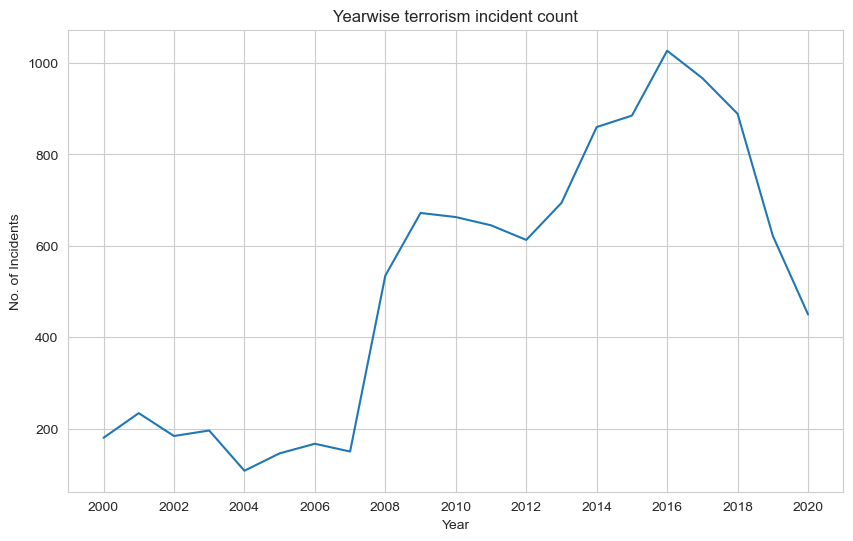

<Figure size 640x480 with 0 Axes>

In [144]:
plt.plot(summary_df['iyear'],summary_df['incidents'])
plt.xlabel('Year')
plt.ylabel('No. of Incidents')
plt.title('Yearwise terrorism incident count')
plt.xticks(ticks=range(2000, 2021, 2));
plt.figure(figsize=(6.4,4.8));


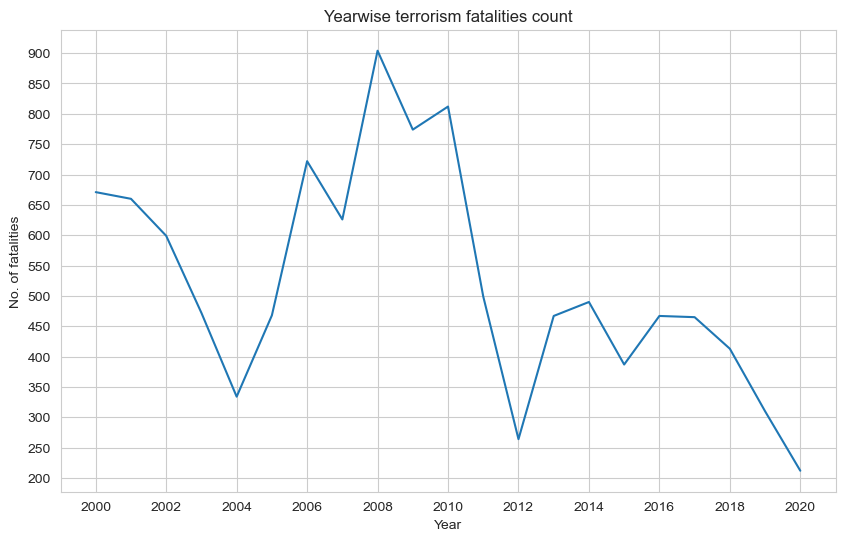

<Figure size 640x480 with 0 Axes>

In [150]:
plt.plot(summary_df['iyear'],summary_df['fatalities'])
plt.xlabel('Year')
plt.ylabel('No. of fatalities')
plt.title('Yearwise terrorism fatalities count')
plt.xticks(ticks=range(2000, 2021, 2))
plt.yticks(ticks=range(200,950,50))
plt.figure(figsize=(6.4,4.8));


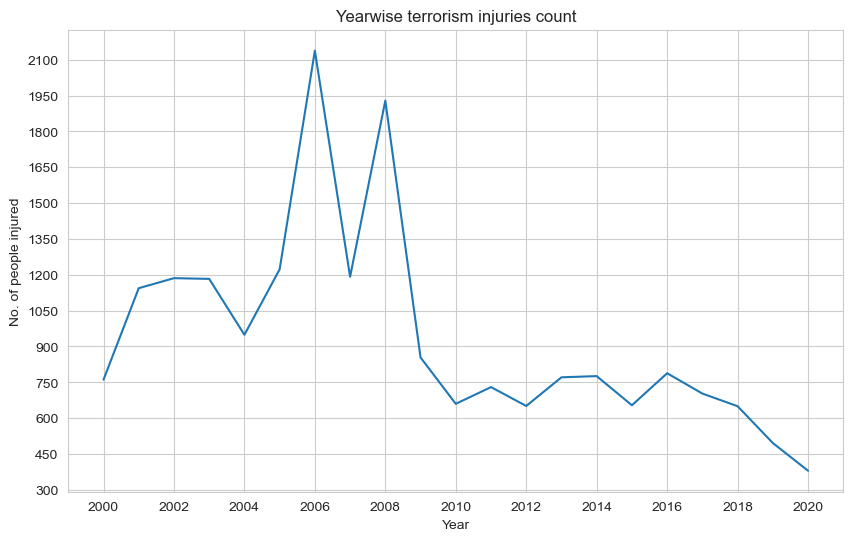

<Figure size 640x480 with 0 Axes>

In [158]:
plt.plot(summary_df['iyear'],summary_df['injuries'])
plt.xlabel('Year')
plt.ylabel('No. of people injured')
plt.title('Yearwise terrorism injuries count')
plt.xticks(ticks=range(2000, 2021, 2));
plt.yticks(ticks=range(300,2150,150))
plt.figure(figsize=(6.4,4.8));


In [138]:
plt.rcParams['font.size']=10
plt.rcParams['figure.figsize']=(10,6)
plt.rcParams['figure.facecolor']='#00000000'
sns.set_style("whitegrid")


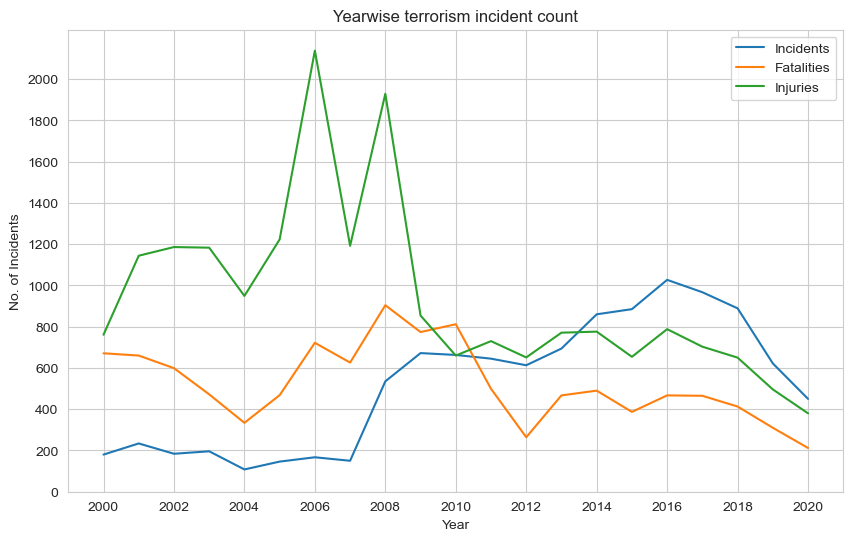

In [140]:
plt.plot(summary_df['iyear'], summary_df['incidents'], label='Incidents')
plt.plot(summary_df['iyear'], summary_df['fatalities'], label='Fatalities')
plt.plot(summary_df['iyear'], summary_df['injuries'], label='Injuries')
plt.xlabel('Year')
plt.ylabel('No. of Incidents')
plt.title('Yearwise terrorism incident count')
plt.xticks(ticks=range(2000, 2021, 2))
plt.yticks(ticks=range(0,2200,200))
plt.legend();



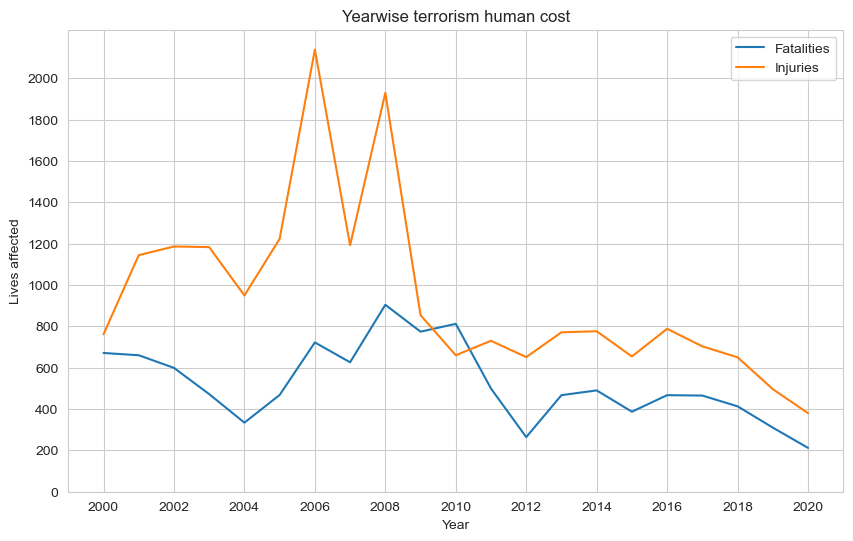

In [142]:
plt.plot(summary_df['iyear'], summary_df['fatalities'], label='Fatalities')
plt.plot(summary_df['iyear'], summary_df['injuries'], label='Injuries')
plt.xlabel('Year')
plt.ylabel('Lives affected')
plt.title('Yearwise terrorism human cost')
plt.xticks(ticks=range(2000, 2021, 2))
plt.yticks(ticks=range(0,2200,200))
plt.legend();